In [90]:
import pandas as pd
from utils import load_data, get_similar_players_cosine, get_similar_players_knn

In [91]:
df, scaled_df, similarity_df = load_data()

/home/asus/stuDYING/IT/DataScience/project/get_data/get_data.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM all_leagues',conn)


In [92]:
label = pd.read_csv('label.csv')
label

,id,name,similar
0,00242b75,Leandro-Barreiro-Martins,"['Jens Stage', 'Tomáš Souček', 'Lucas Tousart'..."
1,00459419,Marko-Arnautovic,"['Anthony Martial', 'Arkadiusz Milik', 'Mikel ..."
2,004d185e,Tete-Morente,"['Joelinton', 'Javier Guerra', 'Mahdi Camara',..."
3,0076ab7f,Nemanja-Gudelj,"['Manuel Gulde', 'Chancel Mbemba', 'Philipp Li..."
4,00963611,Konstantinos-Mavropanos,"['Joël Matip', 'Ibrahima Konaté', 'Sinaly Diom..."
...,...,...,...
1487,ff5ea0bf,Malick-Thiaw,"['Raphaël Varane', 'Marc Guéhi', 'Marin Pongra..."
1488,ff98492b,Robert-Skov,"['Mitchell Weiser', 'Denzel Dumfries', 'Filip ..."
1489,ffacd3d5,Manu-Sanchez,"['Caio Henrique Oliveira Silva', 'Alejandro Po..."
1490,ffec9769,Islam-Slimani,NaN


In [93]:
# replace '-' in name with ' ' in label
label['name'] = label['name'].str.replace('-', ' ')
label

,id,name,similar
0,00242b75,Leandro Barreiro Martins,"['Jens Stage', 'Tomáš Souček', 'Lucas Tousart'..."
1,00459419,Marko Arnautovic,"['Anthony Martial', 'Arkadiusz Milik', 'Mikel ..."
2,004d185e,Tete Morente,"['Joelinton', 'Javier Guerra', 'Mahdi Camara',..."
3,0076ab7f,Nemanja Gudelj,"['Manuel Gulde', 'Chancel Mbemba', 'Philipp Li..."
4,00963611,Konstantinos Mavropanos,"['Joël Matip', 'Ibrahima Konaté', 'Sinaly Diom..."
...,...,...,...
1487,ff5ea0bf,Malick Thiaw,"['Raphaël Varane', 'Marc Guéhi', 'Marin Pongra..."
1488,ff98492b,Robert Skov,"['Mitchell Weiser', 'Denzel Dumfries', 'Filip ..."
1489,ffacd3d5,Manu Sanchez,"['Caio Henrique Oliveira Silva', 'Alejandro Po..."
1490,ffec9769,Islam Slimani,NaN


In [94]:
# drop rows with NaN in label
label = label.dropna()
label

,id,name,similar
0,00242b75,Leandro Barreiro Martins,"['Jens Stage', 'Tomáš Souček', 'Lucas Tousart'..."
1,00459419,Marko Arnautovic,"['Anthony Martial', 'Arkadiusz Milik', 'Mikel ..."
2,004d185e,Tete Morente,"['Joelinton', 'Javier Guerra', 'Mahdi Camara',..."
3,0076ab7f,Nemanja Gudelj,"['Manuel Gulde', 'Chancel Mbemba', 'Philipp Li..."
4,00963611,Konstantinos Mavropanos,"['Joël Matip', 'Ibrahima Konaté', 'Sinaly Diom..."
...,...,...,...
1484,fed17f5a,Carlos Soler,"['Nicolò Fagioli', 'Sean Longstaff', 'Iván Mar..."
1486,ff579c7e,Nikola Moro,"['Pablo Barrios', 'Enzo Le Fée', 'Pape Matar S..."
1487,ff5ea0bf,Malick Thiaw,"['Raphaël Varane', 'Marc Guéhi', 'Marin Pongra..."
1488,ff98492b,Robert Skov,"['Mitchell Weiser', 'Denzel Dumfries', 'Filip ..."


In [95]:
import ast

label_list = ast.literal_eval(label[label['name'] == 'Declan Rice']['similar'].values[0])
label_list

['Valentin Rongier',
 'Pierre Højbjerg',
 'Aurélien Tchouaméni',
 'Nemanja Matić',
 'William Carvalho',
 'Emre Can',
 'Thomas Partey',
 'Matteo Pessina',
 'Moisés Caicedo',
 'Yves Bissouma']

In [96]:
from sklearn.metrics import silhouette_score
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [97]:
similar_players_cosine = get_similar_players_cosine(scaled_df, similarity_df, player_name='Declan Rice')
similar_players_cosine

,Name,Similarity,Position,Squad
1,Valentin Rongier,0.866581,"[CM, CB, WB]",[Marseille]
2,Thomas Partey,0.828299,"[CM, DM, RB]",[Arsenal]
3,Jonathan Gradit,0.824196,[CB],[Lens]
4,Aurelien Tchouameni,0.805473,"[CM, DM, RM]",[Real Madrid]
5,Sofyan Amrabat,0.792615,"[CM, DM, CB]","[Manchester Utd, Fiorentina]"
6,Nemanja Matic,0.789211,"[CM, DM, AM]","[Roma, Rennes]"
7,Lucas Hernandez,0.787795,"[LB, CB, RB]","[Bayern Munich, Paris S-G]"
8,Thiago Alcantara,0.787191,"[LM, CM, DM]",[Liverpool]
9,Benjamin Pavard,0.777030,"[CB, RB, LB]","[Bayern Munich, Inter]"
10,Jurrien Timber,0.775044,"[CB, RB, LB]","[Arsenal, Ajax]"


In [98]:
# put all similar players into a list
similar_players_list_cosine = []
for i in range(len(similar_players_cosine)):
    similar_players_list_cosine.append(similar_players_cosine.iloc[i]['Name'])
similar_players_list_cosine

['Valentin Rongier',
 'Thomas Partey',
 'Jonathan Gradit',
 'Aurelien Tchouameni',
 'Sofyan Amrabat',
 'Nemanja Matic',
 'Lucas Hernandez',
 'Thiago Alcantara',
 'Benjamin Pavard',
 'Jurrien Timber']

In [99]:
import numpy as np
similar_players_list_cosine = np.array(similar_players_list_cosine)
spearman, _ = spearmanr(label_list, similar_players_list_cosine)
kendall_tau, _ = kendalltau(label_list, similar_players_list_cosine)

print(f"Spearman Correlation Coefficient: {spearman}")
print(f"Kendall Tau Correlation Coefficient: {kendall_tau}")

Spearman Correlation Coefficient: 0.2606060606060606
Kendall Tau Correlation Coefficient: 0.15555555555555553


In [100]:
spearman_list_cosine = []

kendall_tau_list_cosine = []

for player in label['name']:
    try:
        if player in label['name'].values:
            label_list = ast.literal_eval(label[label['name'] == player]['similar'].values[0])
            similar_players_cosine = get_similar_players_cosine(scaled_df, similarity_df, player_name=player)
            similar_players_list_cosine = []
            for i in range(len(similar_players_cosine)):
                similar_players_list_cosine.append(similar_players_cosine.iloc[i]['Name'])
            similar_players_list_cosine = np.array(similar_players_list_cosine)[:10]
            spearman, _ = spearmanr(label_list, similar_players_list_cosine)
            kendall_tau, _ = kendalltau(label_list, similar_players_list_cosine)
            spearman_list_cosine.append(spearman)
            kendall_tau_list_cosine.append(kendall_tau)
            # print(f"Player: {player}")
            # print(f"Coefficiente di Spearman tra i due ranking: {spearman}")
            # print(f"Coefficiente di Kendall Tau tra i due ranking: {kendall_tau}")
            # print()
    except (KeyError, TypeError):
        pass
        
mean_spearman_cosine = np.mean(spearman_list_cosine)
mean_kendall_tau_cosine = np.mean(kendall_tau_list_cosine)

print(f"Mean Spearman: {mean_spearman_cosine}")
print(f"Mean Kendall Tau: {mean_kendall_tau_cosine}")

Mean Spearman: 0.007784638304615339
Mean Kendall Tau: 0.006406708278481186


In [101]:
scaled_df

,ID,Min,Name,Squad,Pos,Ast,Att,Att1,Att2,Att3,AttPen,BlockSh,Blocks,CPA,Carries,CarriesFinThird,Clr,Cmp,Cmp1,Cmp2,Cmp3,CrdR,CrdY,CrsPA,DefGoal,DefPen,DefShot,Dis,DribContest,DribTackled,Err,Fld,FldGoal,GCA,Gls,Int,KP,Live,Lost,Mis,PK,PKatt,PPA,Pass,PassAtt,PassDeadGoal,PassDeadShot,PassFinThird,PassLiveGoal,PassLiveShot,PassPrgDist,PassTotDist,PrgC,PrgDist,PrgP,PrgR,Rec,SCA,Sh,ShGoal,ShLSh,SoT,Succ,TO,TO1,TacklesAtt3rd,TacklesDef3rd,TacklesMid3rd,Tkl,TklPlusInt,TklW,Tkld,TotDist,TouchAtt3rd,TouchDef3rd,TouchMid3rd,Touches,npxG,xA,xAG,xG,CmpPct,CmpPct1,CmpPct2,CmpPct3,DribTackledPct,SuccPct,TkldPct
1,00242b75,3390.0,Leandro Barreiro Martins,[Mainz 05],"[CM, DM, RM]",-0.245563,-0.653894,-0.907192,-0.961894,-1.028824,0.078946,1.195289,1.583944,-0.628566,-1.544868,-0.967468,-0.078935,-1.112280,-0.962189,-0.950398,-1.036320,-0.481819,0.280695,-0.560995,-0.334329,-0.295705,3.180184,-0.620404,0.447936,0.210972,0.186012,0.401212,0.361963,0.241012,0.052281,1.813204,-0.509769,-1.040858,0.567615,0.009213,-0.363512,-0.396124,-0.868684,0.810158,-1.140993,-0.430275,-0.502964,-0.397730,0.300714,-0.397577,-0.930541,-1.109328,-0.916230,-1.544389,-0.695103,-0.699436,-1.571242,-0.284036,-0.030764,0.151352,0.106558,0.131377,-0.783721,-0.194270,0.225767,1.660143,-0.091583,1.640915,1.059428,1.545291,1.357553,-0.550950,-1.682477,-0.676296,-0.406711,-0.604451,-1.042721,0.179717,-0.710538,-0.467395,0.068817,-1.049222,-0.974661,-1.067037,-0.894343,0.0,-0.903128,-0.159412
2,00459419,1859.0,Marko Arnautovic,"[Inter, Bologna]",[FW],-0.581527,-0.184961,-0.823778,-1.161112,-1.251918,0.774345,-0.938820,-1.252899,-0.154403,-1.121117,-0.795261,-0.808284,-1.153689,-0.948123,-1.074974,-1.197360,-0.481819,0.307999,-0.692149,-0.334329,-0.814223,-0.955167,0.567642,-1.742883,-1.668933,-0.656674,0.278534,1.159077,0.232096,2.291057,-1.148875,0.505662,-1.332079,-1.376435,1.134005,3.651184,3.036739,0.008231,-0.646142,-1.174956,-0.430275,-0.581174,-1.230710,0.151135,0.579292,-1.365107,-1.202806,-0.770479,-1.511599,-1.066394,0.961151,-0.750603,0.181280,0.291862,-0.679429,-0.407552,0.943994,-0.223433,0.040903,0.835979,-0.836188,-1.402250,-0.917565,-1.475531,-1.511884,-1.435885,-0.141751,-1.354105,0.028194,-1.173197,-0.808172,-1.324737,1.278275,0.190397,0.541755,1.810278,-0.541318,-0.818369,-0.516192,-1.111150,0.0,0.064749,0.195160
3,004d185e,3636.0,Tete Morente,[Elche],"[LM, RM, RB]",-0.569783,0.712835,-0.254584,-0.859720,-0.523892,0.339556,-0.746757,-0.070009,0.820609,-0.459499,0.574190,-0.179248,-0.733626,-0.313443,-0.895687,-0.718981,-0.481819,-0.076519,1.391269,-0.334329,-0.458357,-0.312573,-0.206334,-0.013378,-0.179849,0.128999,0.091043,0.296479,-0.722701,0.136106,0.268846,0.083432,-0.562985,0.153332,0.230618,-0.363512,-0.396124,0.556852,0.517679,-0.630181,-0.430275,-0.143663,-0.781816,-0.604410,-0.014437,-0.754547,-0.817296,1.236650,-0.020351,-0.480853,1.919925,-0.487698,0.124902,0.653966,-0.679429,-0.185861,0.296866,0.615647,1.402424,-0.515177,-0.472207,0.081006,-0.154721,-0.118768,0.046405,-0.122891,0.989398,-0.124845,1.136485,-0.684258,-1.053836,-0.564493,0.003872,-0.245325,-0.334821,-0.085228,-0.916941,-0.183505,-0.768877,-0.327630,0.0,0.676341,1.555275
4,0076ab7f,5842.0,Nemanja Gudelj,[Sevilla],"[CB, DM, CM]",-0.936579,-1.096957,-0.075180,0.850581,-0.138768,-0.986325,1.450493,-0.157507,-0.755718,0.081900,-0.443183,1.105861,0.548818,0.035224,0.976556,0.095348,-0.481819,1.019086,-0.701371,-0.334329,1.044473,-0.555223,-1.220761,-0.258375,0.012991,0.321315,-0.854894,-0.605924,-0.902120,-0.256330,0.385340,-1.241145,0.264207,-0.459557,-1.155244,-0.363512,-0.396124,-1.181479,-1.332304,0.331590,-0.430275,-0.445023,0.366457,-0.779891,-1.190348,0.581979,0.647093,-0.740311,0.432309,-0.236344,-1.232901,0.213794,-1.159541,-0.172158,-0.197343,-0.316908,-0.526508,-1.094577,-0.741107,-0.515177,-0.758633,0.172334,-0.318731,-0.198020,0.048082,0.211987,-1.023049,0.068283,-1.218719,1.086071,0.194746,0.263315,-0.606498,-1.082045,-1.158954,-0.619928,1.228085,0.778322,1.317336,1.06817

/home/asus/anaconda3/envs/datamining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/anaconda3/envs/datamining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/anaconda3/envs/datamining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/anaconda3/envs/datamining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarni

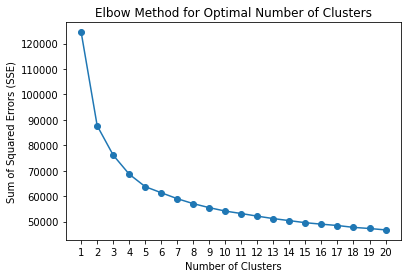

In [102]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols[numerical_cols != 'Min']

sse_values = []
possible_clusters = range(1, 21)

for num_clusters in possible_clusters:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_model.fit(scaled_df[numerical_cols])
    sse_values.append(kmeans_model.inertia_)

plt.plot(possible_clusters, sse_values, marker='o')
plt.xticks(possible_clusters, possible_clusters)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [103]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_scores = []

for num_clusters in range(2, 7):
    kmeans_model = KMeans(n_clusters=num_clusters,
                          random_state=42,
                          n_init='auto')
    kmeans_model.fit(scaled_df[numerical_cols])
    cluster_labels = kmeans_model.labels_
    silhouette_scores.append(silhouette_score(scaled_df[numerical_cols], cluster_labels))

silhouette_scores

[0.2727416833825279,
 0.19239127492280955,
 0.18192214358951744,
 0.17373821332780018,
 0.14195642344049936]

In [104]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(scaled_df[numerical_cols])
cluster_labels = kmeans_model.labels_

scaled_df['Cluster'] = cluster_labels

/home/asus/anaconda3/envs/datamining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [105]:
print(f'Silhouette Score(n=3): {silhouette_score(scaled_df[numerical_cols], cluster_labels)}')

Silhouette Score(n=3): 0.2727416833825279


In [106]:
from sklearn.metrics.pairwise import cosine_similarity

target_player = scaled_df[scaled_df['Name'] == 'Declan Rice']
target_features = target_player[numerical_cols]
target_cluster = target_player['Cluster'].iloc[0]

similar_players_cluster_df = scaled_df[scaled_df['Cluster'] == target_cluster].copy()

similarities = cosine_similarity(target_features, similar_players_cluster_df[numerical_cols])
similarities = similarities[0] * 100
similar_players_cluster_df.loc[:, 'Similarity'] = similarities

similar_players_cluster_df = similar_players_cluster_df.sort_values(by='Similarity', ascending=False)

similar_players_cluster_df = similar_players_cluster_df.iloc[1:11]

similar_players_cluster_df = df[df['Name'].isin(similar_players_cluster_df['Name'])]

similar_players_cluster_df

,ID,Min,Name,Squad,Pos,Ast,Att,Att1,Att2,Att3,AttPen,BlockSh,Blocks,CPA,Carries,CarriesFinThird,Clr,Cmp,Cmp1,Cmp2,Cmp3,CrdR,CrdY,CrsPA,DefGoal,DefPen,DefShot,Dis,DribContest,DribTackled,Err,Fld,FldGoal,GCA,Gls,Int,KP,Live,Lost,Mis,PK,PKatt,PPA,Pass,PassAtt,PassDeadGoal,PassDeadShot,PassFinThird,PassLiveGoal,PassLiveShot,PassPrgDist,PassTotDist,PrgC,PrgDist,PrgP,PrgR,Rec,SCA,Sh,ShGoal,ShLSh,SoT,Succ,TO,TO1,TacklesAtt3rd,TacklesDef3rd,TacklesMid3rd,Tkl,TklPlusInt,TklW,Tkld,TotDist,TouchAtt3rd,TouchDef3rd,TouchMid3rd,Touches,npxG,xA,xAG,xG,CmpPct,CmpPct1,CmpPct2,CmpPct3,DribTackledPct,SuccPct,TkldPct
81,06c48679,4548.0,Jonathan Gradit,[Lens],[CB],0.059367,0.712401,23.449868,30.356201,6.827177,0.178100,0.732190,1.226913,0.039578,54.775726,2.117414,2.552770,55.191293,21.312665,27.803430,4.709763,0.000000,0.277045,0.138522,0.000000,4.848285,0.059367,0.217678,1.721636,1.029024,0.000000,0.098945,0.000000,0.178100,0.039578,1.325858,0.375989,71.576517,0.692612,0.534301,0.0,0.0,0.395778,0.494723,62.730871,0.0,0.019789,6.807388,0.178100,1.207124,398.271768,1005.712401,1.127968,180.969657,7.203166,0.217678,50.936675,1.405013,0.118734,0.000000,0.000000,0.039578,0.356201,0.019789,0.000000,0.197889,0.989446,0.811346,1.998681,3.324538,1.246702,0.296834,318.047493,5.718997,22.658311,43.733509,71.576517,0.017810,0.025726,0.023747,0.017810,86.494340,89.177358,90.090566,66.001887,0.0,26.415094,18.867925
642,41034650,4177.0,Jurrien Timber,"[Arsenal, Ajax]","[CB, RB, LB]",0.043093,1.098875,32.750778,40.723007,5.559014,1.335887,0.430931,0.754130,0.129279,62.097199,1.853005,2.154656,73.926263,30.596122,38.676083,3.619823,0.000000,0.150826,0.021547,0.000000,5.322001,0.064640,0.560211,0.775676,0.603304,0.043093,0.043093,0.000000,0.258559,0.043093,1.314340,0.344745,89.569069,0.172373,0.948049,0.0,0.0,0.797223,0.323198,80.562605,0.0,0.043093,9.092650,0.215466,1.098875,422.980608,1264.977256,2.327029,204.067513,7.993775,1.077328,68.690448,1.357434,0.689490,0.043093,0.086186,0.193919,0.581757,0.021547,0.000000,0.129279,0.711037,0.581757,1.422073,2.736414,0.904956,0.387838,327.529327,8.920278,28.312186,53.112282,89.569069,0.112042,0.056021,0.017237,0.112042,91.276596,93.323404,94.678723,58.270213,0.0,36.738298,23.653191
689,45a03961,7568.0,Benjamin Pavard,"[Bayern Munich, Inter]","[CB, RB, LB]",0.023784,0.190275,33.845137,41.099366,8.253171,1.593552,0.642178,1.427061,0.071353,58.580867,0.832452,3.044397,75.515328,31.323996,37.603066,5.470402,0.023784,0.261628,0.237844,0.023784,7.159091,0.118922,0.118922,1.522199,1.094080,0.000000,0.023784,0.000000,0.118922,0.142706,1.760042,0.547040,95.993658,0.428118,0.356765,0.0,0.0,0.594609,0.784884,85.409619,0.0,0.000000,6.279070,0.095137,1.189218,492.906977,1331.662262,1.165433,137.521142,6.635835,2.330867,69.307611,1.427061,1.046512,0.000000,0.095137,0.380550,0.023784,0.000000,0.000000,0.214059,1.165433,0.927590,2.307082,4.067125,1.403277,0.047569,258.012685,11.464059,37.840909,46.902748,95.993658,0.085624,0.099894,0.057082,0.085624,88.465306,92.116327,90.965306,65.728571,0.0,2.040816,4.081633
784,4f255115,4187.0,Aurelien Tchouameni,[Real Madrid],"[CM, DM, RM]",0.085980,1.225221,34.005254,30.501552,5.115835,1.031765,0.257941,0.859804,0.107476,56.188202,1.805589,1.612133,66.204920,32.264151,28.502508,4.062575,0.000000,0.128971,0.042990,0.000000,3.503702,0.021495,0.451397,1.268211,0.752329,0.000000,0.064485,0.021495,0.365417,0.042990,1.848579,0.730834,82.713160,0.515882,1.117745,0.0,0.0,0.558873,0.601863,71.922618,0.0,0.042990,7.222355,0.322427,1.913064,327.735849,1080.687843,1.612133,140.449009,6.749463,0.945785,63.861954,2.256986,1.461667,0.021495,0.150466,0.279436,0.816814,0.064485,0.000000,0.171961,0.945785,1.203726,2.321471,4.170050,1.354192,0.257941,290.183903,12.381180,18.055887,52.834965,82.713160,0.062336,0.062336,0.070934,0.062336,91.801563,93.728125,93.579688,63.653125,0.0,27.735937,11.717187
823,529f49ab,3174.0,Thomas Partey,[Arsenal],"[CM, DM, RB]",0.000000,1.644612,31.928166,29.092628,8.421550,1.020794,0.22

In [107]:
temp = similar_players_cluster_df[['ID', 'Name', 'Squad', 'Pos']]
temp

,ID,Name,Squad,Pos
81,06c48679,Jonathan Gradit,[Lens],[CB]
642,41034650,Jurrien Timber,"[Arsenal, Ajax]","[CB, RB, LB]"
689,45a03961,Benjamin Pavard,"[Bayern Munich, Inter]","[CB, RB, LB]"
784,4f255115,Aurelien Tchouameni,[Real Madrid],"[CM, DM, RM]"
823,529f49ab,Thomas Partey,[Arsenal],"[CM, DM, RB]"
904,5a2cb25d,Sofyan Amrabat,"[Manchester Utd, Fiorentina]","[CM, DM, CB]"
1158,77e84962,Thiago Alcantara,[Liverpool],"[LM, CM, DM]"
1847,c3ee18ef,Lucas Hernandez,"[Bayern Munich, Paris S-G]","[LB, CB, RB]"
2202,eb7822d7,Nemanja Matic,"[Roma, Rennes]","[CM, DM, AM]"
2211,ed45c4a5,Valentin Rongier,[Marseille],"[CM, CB, WB]"


In [108]:
def get_similar_players_cluster(scaled_df, player_name):
    target_player = scaled_df[scaled_df['Name'] == 'Declan Rice']
    target_features = target_player[numerical_cols]
    target_cluster = target_player['Cluster'].iloc[0]

    similar_players_cluster_df = scaled_df[scaled_df['Cluster'] == target_cluster].copy()

    similarities = cosine_similarity(target_features, similar_players_cluster_df[numerical_cols])
    similarities = similarities[0] * 100

    similar_players_cluster_df.loc[:, 'Similarity'] = similarities

    similar_players_cluster_df = similar_players_cluster_df.sort_values(by='Similarity', ascending=False)

    similar_players_cluster_df = similar_players_cluster_df.iloc[1:11]

    similar_players_cluster_df = df[df['Name'].isin(similar_players_cluster_df['Name'])]

    return similar_players_cluster_df

In [109]:
similar_players_list_cluster = []
for i in range(len(similar_players_cluster_df)):
    similar_players_list_cluster.append(similar_players_cluster_df.iloc[i]['Name'])
similar_players_list_cluster

['Jonathan Gradit',
 'Jurrien Timber',
 'Benjamin Pavard',
 'Aurelien Tchouameni',
 'Thomas Partey',
 'Sofyan Amrabat',
 'Thiago Alcantara',
 'Lucas Hernandez',
 'Nemanja Matic',
 'Valentin Rongier']

In [110]:
import numpy as np
similar_players_list_cluster = np.array(similar_players_list_cluster)
spearman, _ = spearmanr(label_list, similar_players_list_cluster)
kendall_tau, _ = kendalltau(label_list, similar_players_list_cluster)

print(f"Spearman Correlation Coefficient: {spearman}")
print(f"Kendall Tau Correlation Coefficient: {kendall_tau}")

Spearman Correlation Coefficient: 0.29696969696969694
Kendall Tau Correlation Coefficient: 0.19999999999999998


In [111]:
spearman_list_cluster = []

kendall_tau_list_cluster = []

for player in label['name']:
    try:
        if player in label['name'].values:
            label_list = ast.literal_eval(label[label['name'] == player]['similar'].values[0])
            similar_players_cluster = get_similar_players_cluster(scaled_df, player_name=player)
            similar_players_list_cluster = []
            for i in range(len(similar_players_cluster)):
                similar_players_list_cluster.append(similar_players_cluster.iloc[i]['Name'])
            similar_players_list_cluster = np.array(similar_players_list_cluster)[:10]
            spearman, _ = spearmanr(label_list, similar_players_list_cluster)
            kendall_tau, _ = kendalltau(label_list, similar_players_list_cluster)
            spearman_list_cluster.append(spearman)
            kendall_tau_list_cluster.append(kendall_tau)
            # print(f"Player: {player}")
            # print(f"Coefficiente di Spearman tra i due ranking: {spearman}")
            # print(f"Coefficiente di Kendall Tau tra i due ranking: {kendall_tau}")
            # print()
    except (KeyError, TypeError):
        pass
        
mean_spearman_cluster = np.mean(spearman_list_cluster)
mean_kendall_tau_cluster = np.mean(kendall_tau_list_cluster)

print(f"Mean Spearman: {mean_spearman_cluster}")
print(f"Mean Kendall Tau: {mean_kendall_tau_cluster}")

Mean Spearman: -0.003235796359005527
Mean Kendall Tau: -0.003077576143478723
